# Heatmap of differentially expressed genes in an RNA-seq dataset

This notebook follows closely to [this online tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-heatmap2/tutorial.html#create-heatmap-of-top-de-genes).  The datasets are available [here](https://zenodo.org/record/2529926#.YwaRPfHMIas) and should be downloaded into the ```data/heatmap``` directory (which you may have to create).

In [1]:
# import the necessary libraries
import pandas as pd

import seaborn as sns
%matplotlib inline

## 1. Read in the DE results data using ```pandas```.

In [2]:
DE_results = pd.read_csv('data/heatmap/limma-voom_luminalpregnant-luminallactate.tsv',sep='\t')
DE_results

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
0,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.562950,-43.796498,3.830650e-15,6.053959e-11
1,13358,Slc25a1,solute carrier family 25 (mitochondrial carrie...,-4.124175,5.779699,-29.907849,1.758595e-13,1.389642e-09
2,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.282143,-27.819499,4.836363e-13,2.432800e-09
3,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), m...",-4.177812,4.278629,-27.072723,6.157428e-13,2.432800e-09
4,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.440914,-25.223566,1.499977e-12,4.741129e-09
...,...,...,...,...,...,...,...,...
15799,20525,Slc2a1,solute carrier family 2 (facilitated glucose t...,-0.000876,8.021892,0.000000,9.999997e-01,9.999999e-01
15800,103836,Zfp692,zinc finger protein 692,-0.000015,4.837269,0.000000,9.999997e-01,9.999999e-01
15801,170718,Idh3b,isocitrate dehydrogenase 3 (NAD+) beta,-0.000833,6.668953,0.000000,9.999998e-01,9.999999e-01
15802,71810,Ranbp3,RAN binding protein 3,0.000107,5.753686,0.000000,9.999998e-01,9.999999e-01


## 2. Filter the results to only include the most significant genes.

### 2.1. Set a threshold for ```adj.P.Val < 0.01``` and ```abs(logFC) > 0.58```.

In [3]:
df = DE_results.loc[(DE_results['adj.P.Val'] < 0.01) & (abs(DE_results['logFC']) > 0.58)]

### 2.2. Sort by ```P.Value``` (in ascending order).

In [4]:
df = df.sort_values('P.Value')

### 2.3. Select the top 20 for the plot.

In [5]:
DE_results_sig = df.head(20)

DE_results_sig

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
0,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.562950,-43.796498,3.830650e-15,6.053959e-11
1,13358,Slc25a1,solute carrier family 25 (mitochondrial carrie...,-4.124175,5.779699,-29.907849,1.758595e-13,1.389642e-09
2,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.282143,-27.819499,4.836363e-13,2.432800e-09
3,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), m...",-4.177812,4.278629,-27.072723,6.157428e-13,2.432800e-09
4,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.440914,-25.223566,1.499977e-12,4.741129e-09
5,13645,Egf,epidermal growth factor,-5.362664,0.735905,-24.599303,2.116244e-12,5.574188e-09
6,230810,Slc30a2,"solute carrier family 30 (zinc transporter), m...",-3.203118,2.695811,-23.804278,3.024668e-12,6.828836e-09
7,68801,Elovl5,"ELOVL family member 5, elongation of long chai...",-2.863304,6.455205,-22.353575,6.598744e-12,1.303582e-08
8,19659,Rbp1,"retinol binding protein 1, cellular",5.443044,6.107033,21.052358,1.479143e-11,2.364746e-08
9,26366,Ceacam10,carcinoembryonic antigen-related cell adhesion...,-3.295621,1.821014,-20.939269,1.496296e-11,2.364746e-08


## 3. Read in the normalized counts data using ```pandas```.

In [6]:
normalized_counts = pd.read_csv('data/heatmap/limma-voom_normalised_counts.tsv',sep='\t')
normalized_counts

,ENTREZID,SYMBOL,GENENAME,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
0,497097,Xkr4,X-linked Kx blood group related 4,3.932532,3.507368,1.272317,3.292541,3.990985,3.724252,-5.801942,-5.888782,-5.481642,-5.343143,-4.709206,-4.722615
1,20671,Sox17,SRY (sex determining region Y)-box 17,1.890808,2.787899,1.605217,2.121856,0.964287,1.923156,-0.757548,-0.216357,-0.272189,-1.255680,-1.901851,-0.330297
2,27395,Mrpl15,mitochondrial ribosomal protein L15,3.429894,3.149591,3.637638,3.631978,3.703738,3.636318,4.328628,3.970753,4.453523,4.016606,4.555237,4.697346
3,18777,Lypla1,lysophospholipase 1,4.505933,4.285975,5.128398,5.270351,5.380101,5.185279,4.888929,4.863599,4.903142,4.993363,5.379583,5.461021
4,21399,Tcea1,transcription elongation factor A (SII) 1,5.804007,5.822559,5.988345,5.764344,5.700630,5.615502,5.580141,5.408707,5.579729,5.512504,5.280898,5.244612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15799,100861696,NaN,NaN,3.367987,3.704507,3.768325,3.636771,2.820551,2.383382,3.924276,3.601066,3.492772,3.289852,3.445612,2.219900
15800,100862004,NaN,NaN,7.281673,7.287549,7.575261,7.584857,6.746249,6.238511,7.470250,7.629010,7.722165,7.536631,6.839135,6.316990
15801,100861837,NaN,NaN,0.842599,1.331429,1.785789,1.695378,1.972554,1.568061,2.352876,2.139124,0.708182,0.722946,0.244991,-0.199053
15802,100861924,NaN,NaN,0.897565,1.807528,2.163707,1.434180,0.711168,0.999777,2.062244,1.845928,2.382544,1.622641,2.032261,0.949811


## 4. Match the normalized counts to our ```DE_results_sig``` dataframe.

We will use ```pandas.DataFrame.merge``` with the ```ENTREZID``` column.

In [7]:
DE_results_sig_counts = DE_results_sig.merge(normalized_counts, on = 'ENTREZID', suffixes = ['','_counts'])
DE_results_sig_counts.columns

Index(['ENTREZID', 'SYMBOL', 'GENENAME', 'logFC', 'AveExpr', 't', 'P.Value',
       'adj.P.Val', 'SYMBOL_counts', 'GENENAME_counts', 'MCL1.DG', 'MCL1.DH',
       'MCL1.DI', 'MCL1.DJ', 'MCL1.DK', 'MCL1.DL', 'MCL1.LA', 'MCL1.LB',
       'MCL1.LC', 'MCL1.LD', 'MCL1.LE', 'MCL1.LF'],
      dtype='object')

## 5. Create a heatmap using ```seaborn```.

The y-axis will show the ```SYMBOL``` values.  The x-axis will show the ```MCL.*``` column names.  The colors will be defined by the respective ```MCL.*``` values.  

### 5.1. Select only the columns that we want to show in the plot.

In [8]:
# create a mask that has values of True for the columns that have names with 'SYMBOL' and 'MCL1.''
mask = DE_results_sig_counts.columns.str.contains('SYMBOL|MCL1.')

# remove the 'SYMBOL_counts' column (from the normalized counts file). 
# Note: this is only necessary here because the 'SYMBOL' column exists in both data files 
#   (and I renamed the 'SYMBOL' column in the normalized counts file to be 'SYMBOL_counts' during the merge.) 
mask *= ~DE_results_sig_counts.columns.str.contains('SYMBOL_counts')

# apply the mask
df = DE_results_sig_counts.loc[:, mask]

### 5.2. Set the index of the dataframe to be the ```SYMBOL``` names.

In [9]:
df.set_index('SYMBOL', drop = True, inplace = True)
df.index.name = None # remove the name from the index so that it doesn't show as a label in the plot below
df

,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
Csn1s2b,-3.036547,-2.264422,-0.334841,0.015467,6.000618,5.805354,1.665663,1.077002,3.801446,4.519494,12.763715,12.742450
Slc25a1,4.881465,4.574209,4.407566,4.365098,4.983846,5.116211,5.011037,4.868608,5.702613,5.747631,9.713845,9.984259
Atp2b2,-1.451584,-0.968966,-2.301674,-2.139811,1.797468,1.156747,-1.554015,-1.133895,1.507043,2.108068,8.998261,9.368077
Slc34a2,-0.229192,0.615997,2.363016,1.962999,2.943408,3.218612,3.266836,3.617029,6.368154,6.246040,10.337535,10.633115
Acacb,2.860002,3.355632,3.068617,3.178834,3.540934,3.844546,2.748804,3.268565,4.671910,4.726978,8.906309,9.119834
Egf,-0.889705,-1.079997,-1.237544,-1.351316,0.249264,0.171544,-0.943961,-0.759499,0.785144,1.196015,6.348109,6.342802
Slc30a2,0.950514,1.331429,0.925395,0.283400,0.861193,0.785652,1.665663,1.330386,4.414690,4.491328,7.657390,7.652696
Elovl5,5.705402,5.701887,6.012446,5.811738,6.333922,6.344328,5.295431,5.250130,6.198278,6.442718,9.146733,9.219442
Rbp1,7.720129,7.731602,7.024142,6.908304,5.968943,5.980475,6.068808,6.213522,7.720941,7.554891,2.639522,1.753119
Ceacam10,-3.036547,-2.916498,-0.403554,-1.511780,0.013196,0.229259,3.471853,3.038996,4.131226,4.055600,7.378589,7.401830


### 5.3. (Optional) scale each row to go from -1 to 1.

In [10]:
# this will be easier if we transpose the data frame first
tmp = df.transpose()
for c in tmp.columns:
    data = tmp[c]
    norm = 2.*(data - min(data))/(max(data) - min(data)) - 1
    tmp[c] = norm
df = tmp.transpose()
df

,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
Csn1s2b,-1.000000,-0.902264,-0.658018,-0.613676,0.143926,0.119209,-0.404793,-0.479306,-0.134446,-0.043555,1.000000,0.997308
Slc25a1,-0.816212,-0.925572,-0.984884,-1.000000,-0.779772,-0.732660,-0.770094,-0.820788,-0.523945,-0.507922,0.903753,1.000000
Atp2b2,-0.854309,-0.771596,-1.000000,-0.972259,-0.297476,-0.407285,-0.871864,-0.799862,-0.347250,-0.244244,0.936620,1.000000
Slc34a2,-1.000000,-0.844381,-0.522715,-0.596367,-0.415852,-0.365180,-0.356301,-0.291822,0.214723,0.192239,0.945577,1.000000
Acacb,-0.965093,-0.809504,-0.899604,-0.865005,-0.751334,-0.656024,-1.000000,-0.836836,-0.396297,-0.379010,0.932970,1.000000
Egf,-0.880092,-0.929522,-0.970447,-1.000000,-0.584234,-0.604423,-0.894186,-0.846270,-0.445034,-0.338306,1.000000,0.998621
Slc30a2,-0.819063,-0.715750,-0.825876,-1.000000,-0.843289,-0.863777,-0.625098,-0.716033,0.120503,0.141289,1.000000,0.998727
Elovl5,-0.770604,-0.772375,-0.615895,-0.717025,-0.453914,-0.448671,-0.977174,-1.000000,-0.522261,-0.399096,0.963365,1.000000
Rbp1,0.996162,1.000000,0.763331,0.724579,0.410332,0.414190,0.443740,0.492152,0.996433,0.940884,-0.703469,-1.000000
Ceacam10,-1.000000,-0.976999,-0.495517,-0.707854,-0.415667,-0.374269,0.247014,0.164078,0.373350,0.358860,0.995547,1.000000


### 5.3. Use ```seaborn```'s heatmap function.

- Use a blue - white - red colormap, using the ```cmap``` keyword.  See [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for available colormaps.
- Set the limits for the colormap to be symmetric around zero, so that white is shown at zero, using the ```vmin``` and ```vmax``` keywords.
- Add a label to the colorbar, using the ```cbar_kws``` keyword. 
- See other keyword options [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

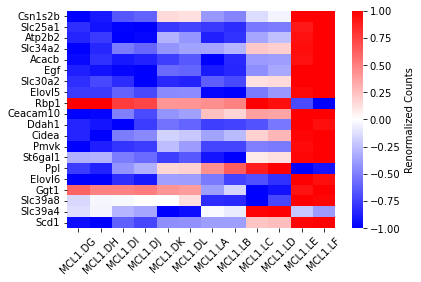

In [11]:
# create the figure (and display it in the notebook)
f = sns.heatmap(df, cmap = 'bwr', vmin = -1, vmax = 1, cbar_kws = {'label': 'Renormalized Counts'})

# (optional) rotate the x tick labels by 45 degrees
f.set_xticklabels(f.get_xticklabels(), rotation = 45)

# save the figure to a png file
f.figure.savefig('DE_heatmap.png', bbox_inches = 'tight')